In [1]:
'''Importing packages'''
import sys
#sys.path.append('C:/Users/JacobSkaarup/Dropbox/Bachelorprojekt/FolderBrowser-master')
sys.path.append('/Users/QDevMaster12/Dropbox/Jupyter_notebooks/FolderBrowser-master')
import numpy as np
from scipy import constants
from scipy import signal
from sweep import Sweep
import matplotlib.pyplot as plt
import importlib.util
from plothandler import plot_handler_factory
from datahandler import data_handler_factory
from custom_colormap import get_colormap
import shared_phd

In [2]:
'''Input'''
#data_path = 'C:/Users/JacobSkaarup/Seafile/A2S9B/data/2017-04-25#017'
data_path = '/Users/QDevMaster12/Seafile/A2S9B/data/2017-04-27#007'
x_name = 'g11'
y_name = 'g7'
z_name = 'conductance4'
Width = np.linspace(5, 18, 10)
# Width = np.linspace(1, 20, 10)
slicer_x = -4.52
slicer_y = -7.53

# Del_V_gm1 = 

# Constants
q_e = constants.elementary_charge
h_p = constants.Planck
k_B = constants.Boltzmann
temp = 28*10^-3
k_B_T = k_B*temp
Con_quan = q_e**2/h_p

In [3]:
'''Importing data'''
# Importing pcols
#pcols_path = 'C:/Users/JacobSkaarup/Seafile/A2S9B/brw/pcols.py'
pcols_path = '/Users/QDevMaster12/Seafile/A2S9B/brw/pcols.py'
spec = importlib.util.spec_from_file_location('', pcols_path)
pcols = importlib.util.module_from_spec(spec)
spec.loader.exec_module(pcols)

# Data path
sweep = Sweep(data_path)
sweep.set_pdata(pcols.name_func_dict)

# Raw data:
x = sweep.get_data(x_name)
y = sweep.get_data(y_name)
z = sweep.get_data(z_name)

In [4]:
'''Finding peaks'''

# Making !D arrays (the number doesn't matter, they are all the same in that direction)
x_1D = x[:,1]
y_1D = y[1,:]

# Making data-set 1D for x-gate
x_idx = np.searchsorted(x_1D, slicer_x)
z_slice_x = z[:,x_idx]

# Making data-set 1D for y_gate
y_idx = np.searchsorted(y_1D, slicer_y)
z_slice_y = z[:,y_idx]


# Finding peak index
peakind1 = signal.find_peaks_cwt(z_slice_x, Width)
peakind2 = signal.find_peaks_cwt(z_slice_y, Width)


# Making corrections
## on x-slicer
peakind2[1] = peakind2[1]+10
peakind2[0] = peakind2[0]+1
del peakind2[2]
## on y-slicer
peakind1[0] = peakind1[0]-4
peakind1[1] = peakind1[1]-4
del peakind1[2]

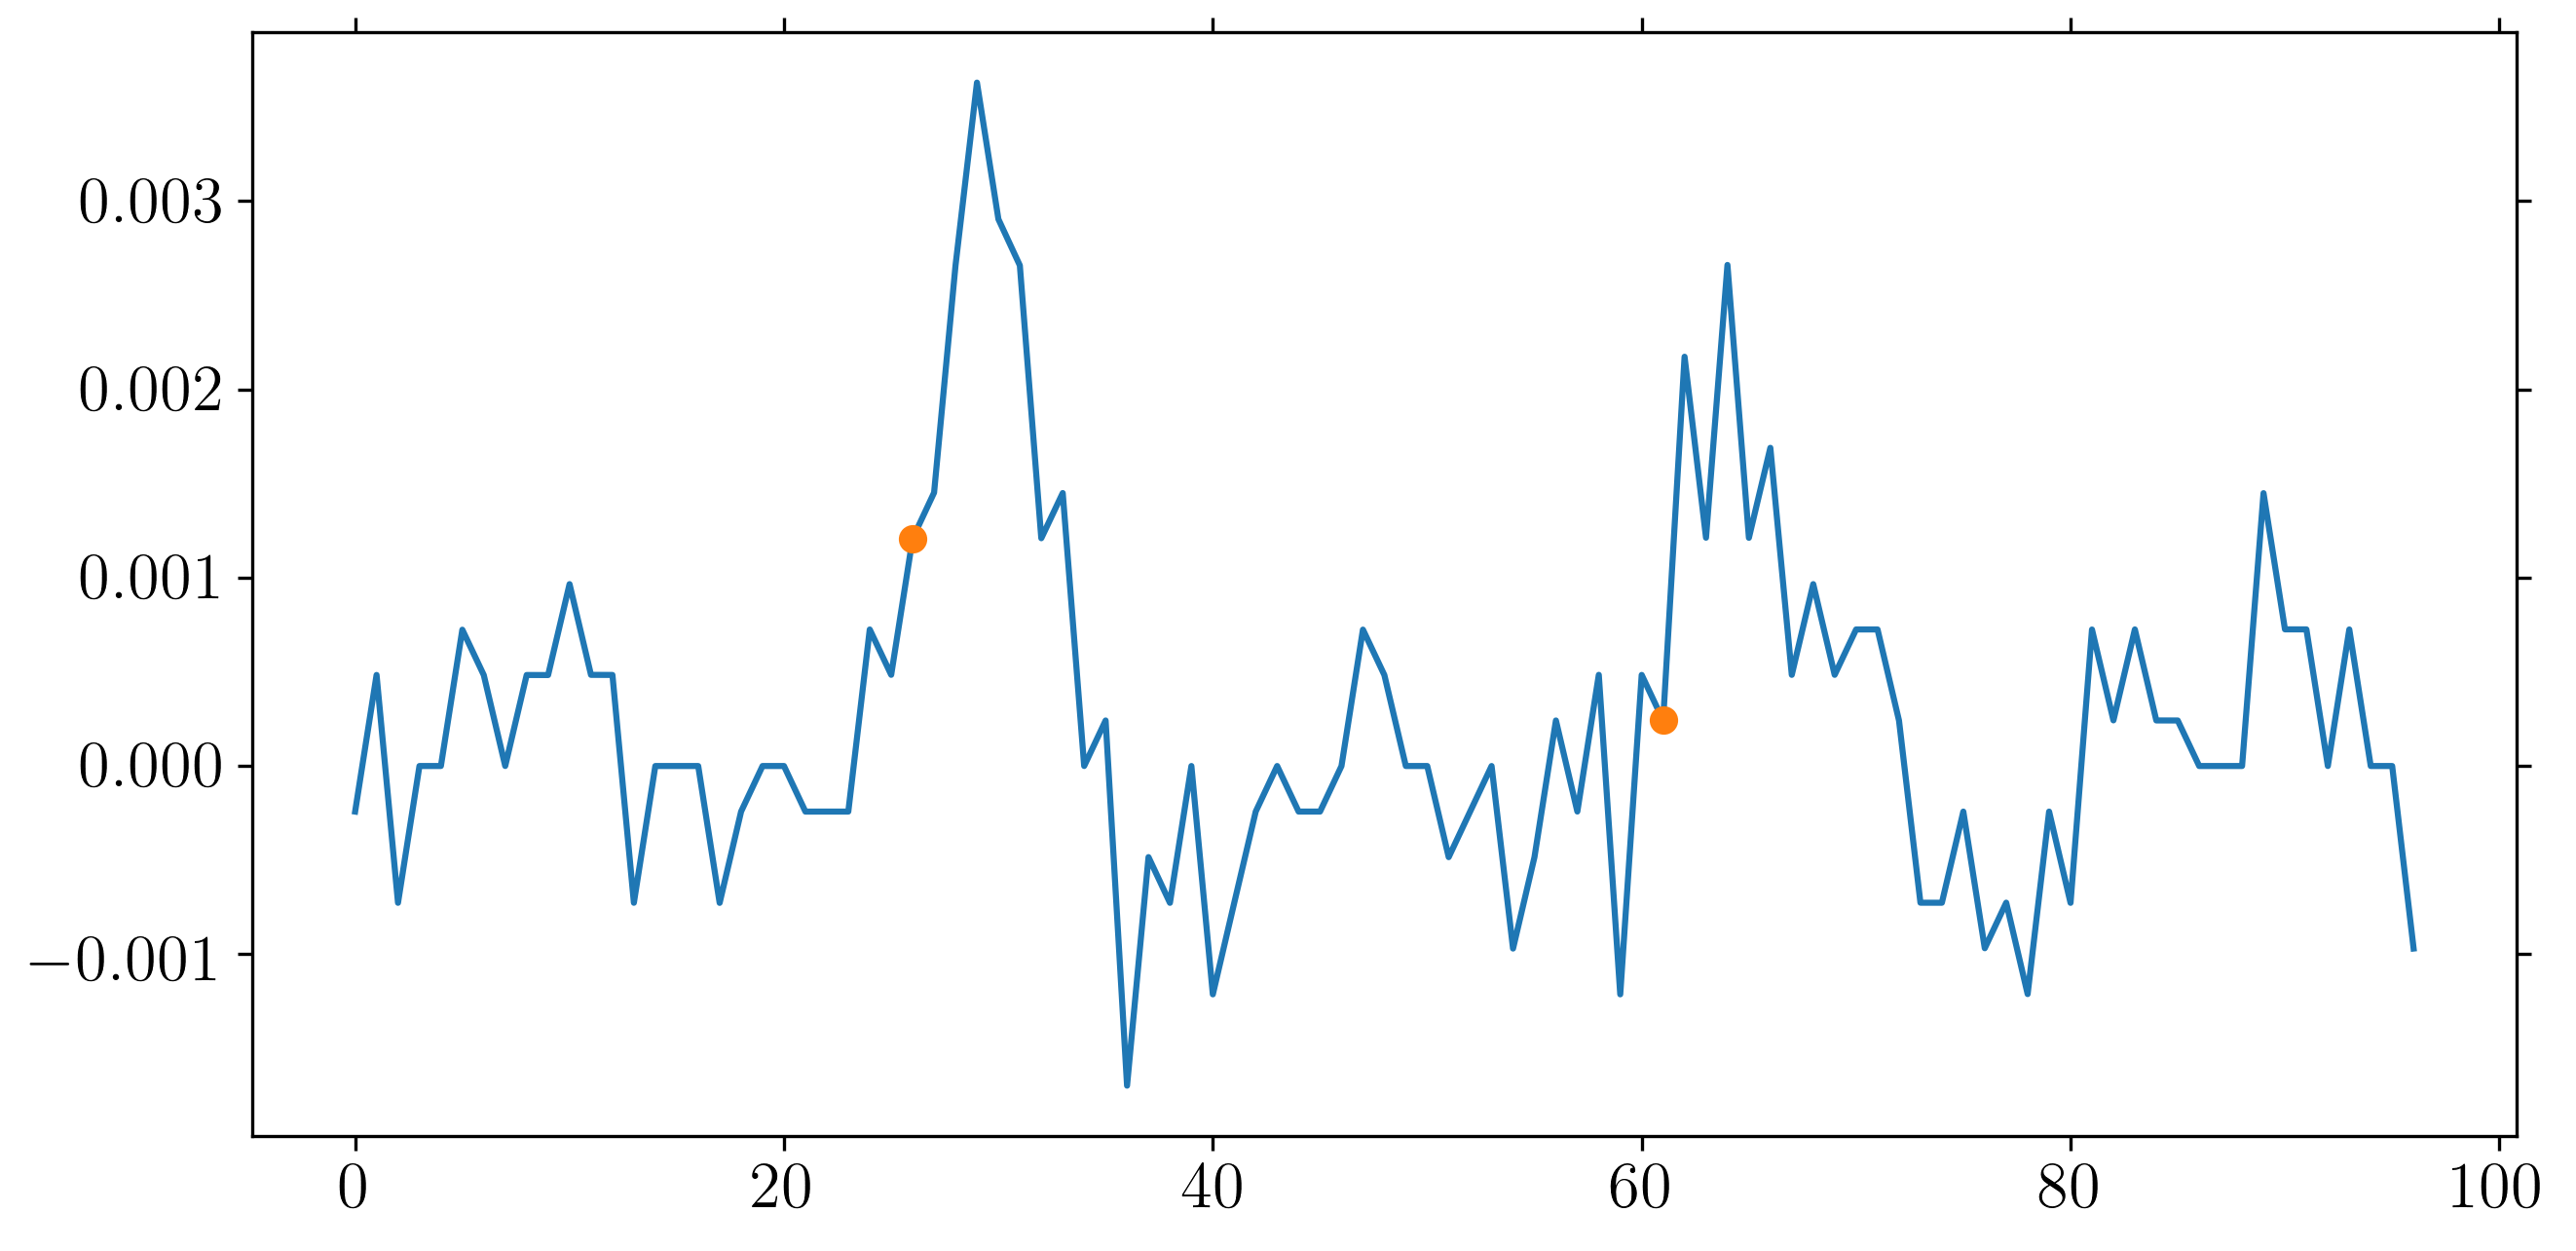

In [5]:
'''Showing allignment for x'''
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(z_slice_x)
ax.plot(peakind1, z[peakind1, x_idx], 'o')
plt.show()

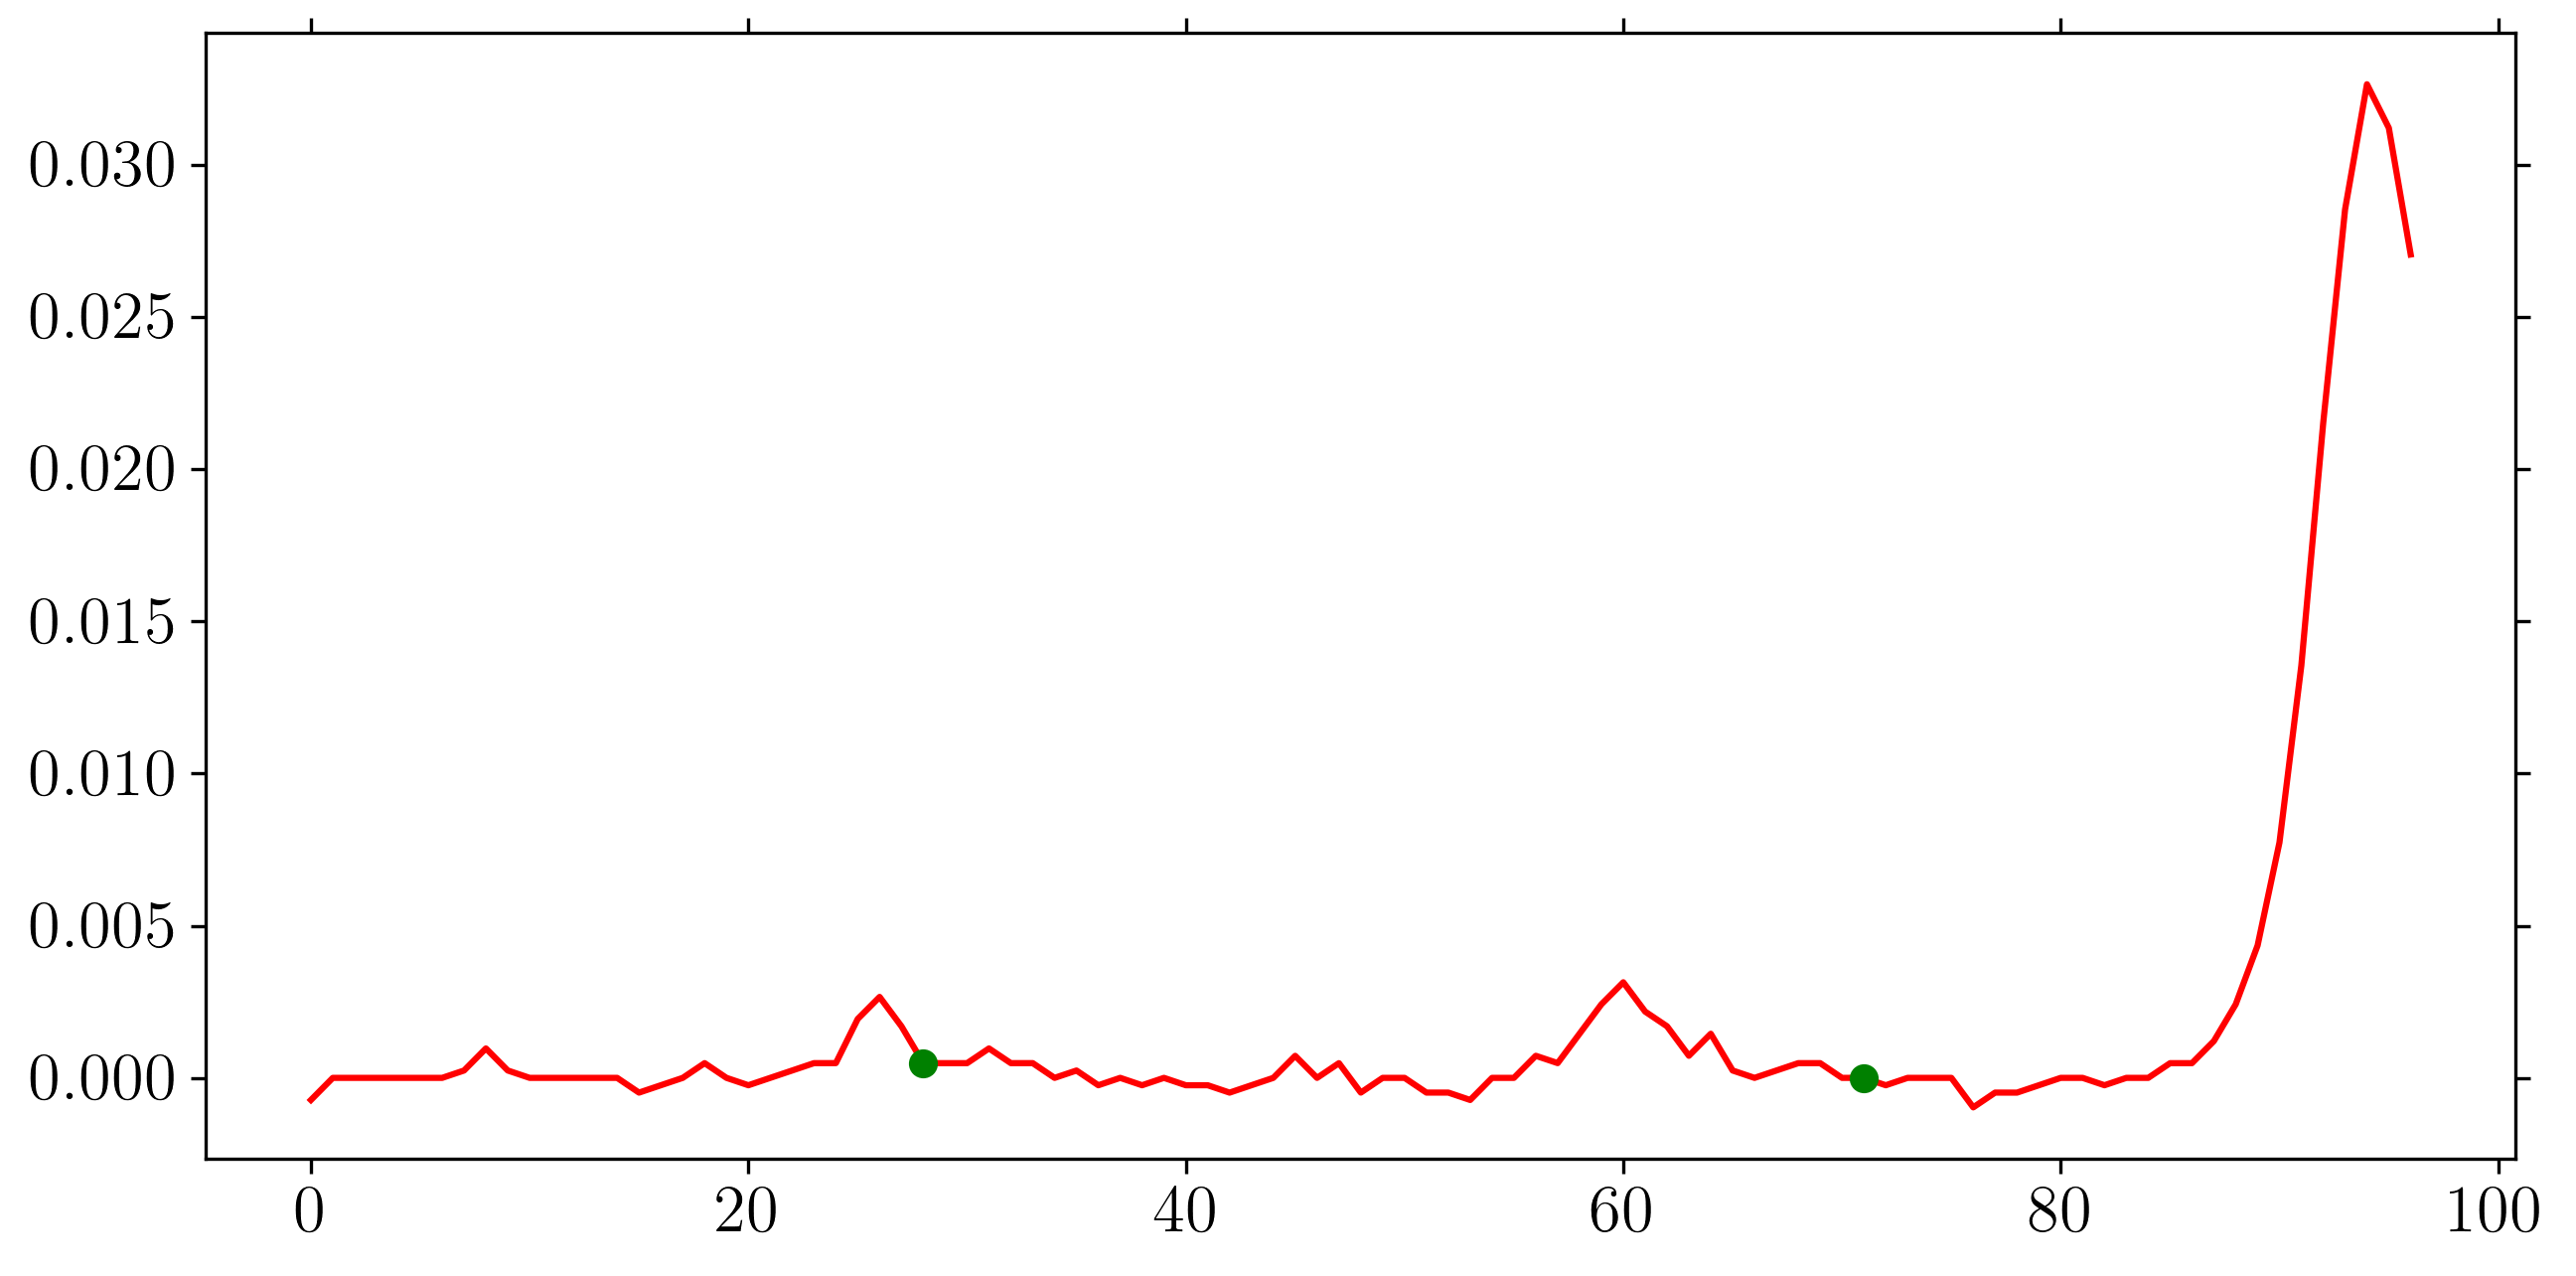

In [6]:
'''Showing allignment for y'''
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(z_slice_y, 'r')
ax.plot(peakind2, z[peakind2, y_idx], 'go')
plt.show()

In [7]:
'''From index to gate-voltage'''
# x_idx_v = x[peakind1]
# y_idx_v = y[peakind2]

'From index to gate-voltage'

In [8]:
% matplotlib notebook

<IPython.core.display.Javascript object>


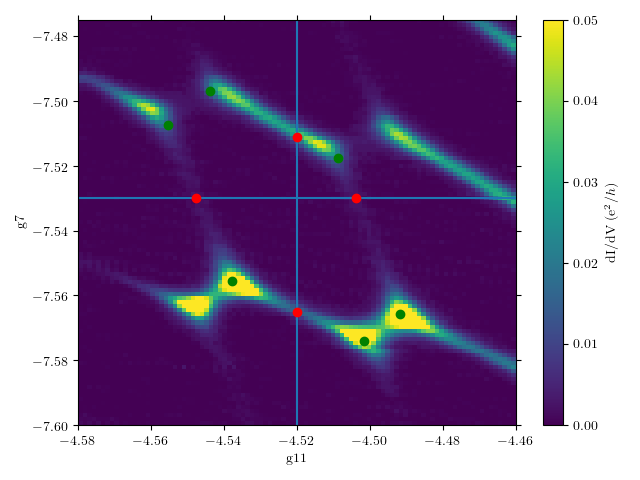

In [9]:
'''Plotting for adjustment'''
data_h = data_handler_factory(x, y, z)
fig, ax = plt.subplots()
plot_h = plot_handler_factory(ax, data_h, plot_dim=2)
ax.ticklabel_format(style='sci', axis='both',
                    scilimits=(-3, 3), useOffset=False)
ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
#ax.set_xlim([-8.0, -6.0])
#ax.set_ylim([-10.0, -3.4533333333333331])
im = plot_h.plot(plot_type=None)
cbar = fig.colorbar(mappable=im)
cbar.formatter.set_powerlimits((-3, 3))
cbar.set_label('dI/dV (e^2/h)')
zlim = [0, 0.05]
im.set_clim(zlim)
cmap = get_colormap('viridis', zlim)
im.set_cmap(cmap)
plt.tight_layout()

# Plotting slice lines:
plt.axvline(x=slicer_x)
plt.axhline(y=slicer_y)

# Plotting data points on slicers:
slicer_x_list = np.full_like(y_1D[peakind2], slicer_x)
slicer_y_list = np.full_like(x_1D[peakind1], slicer_y)

plt.plot(x_1D[peakind1], slicer_y_list, 'or')
plt.plot(slicer_x_list, y_1D[peakind2], 'or')


# Plotting trible point
tp_tx = [-4.55525, -4.54366, -4.50872]
tp_ty = [-7.50732, -7.49706, -7.51759]

tp_bx = [-4.53777, -4.50146, -4.49164]
tp_by = [-7.55549, -7.57405, -7.56576]

plt.plot(tp_tx, tp_ty, 'og')
plt.plot(tp_bx, tp_by, 'og')

plt.show()

In [10]:
'''Finding variables: Vg1 and Vg2'''
Del_Vg1_list = []
for peak in range(len(x_1D[peakind1])-1):
    Del_Vg1_list.append(x_1D[peakind1[peak+1]] - x_1D[peakind1[peak]])

Del_Vg2_list = []
for peak in range(len(y_1D[peakind2])-1):
    Del_Vg2_list.append(y_1D[peakind2[peak+1]] - y_1D[peakind2[peak]])

    
print(' Vg1 =', Del_Vg1_list, '\n', 'Vg2 =', Del_Vg2_list)


'''Finding varaible Vg1m'''
Del_Vg1m = tp_tx[1] - tp_tx[0]
Del_Vg2m = tp_by[2] - tp_by[1]

print(' Vg1m =', Del_Vg1m, '\n', 'Vg2m =', Del_Vg2m)

 Vg1 = [0.043750000000000178] 
 Vg2 = [0.053749999999999964]
 Vg1m = 0.01158999999999999 
 Vg2m = 0.008289999999999687


In [11]:
'''Calculations: Vg1 and Vg2 '''
# # Capacitances
C_g1 = []
for no in range(len(Del_Vg1_list)):
    C_g1.append(abs(q_e)/Del_Vg1_list[no])
print('Cg1 =', C_g1)

C_g2 = []
for no in range(len(Del_Vg2_list)):
    C_g2.append(abs(q_e)/Del_Vg2_list[no])
print('Cg2 =', C_g2)

C1 = []
print('C1 =', C1)

C2 = []
print('C2 =', C2)

C_m = Del_Vg1m*C_g2[0]/Del_Vg1_list[0]
print('Cgm =', C_m)

# Charging energy
E_C1 = (q_e**2/C_g1[0])*(1/(1-(C_m**2/C_g1[0]*C_g2[0])))
print('EC1 =', E_C1)

E_C2 = (q_e**2/C_g2[0])*(1/(1-(C_m**2/C_g1[0]*C_g2[0])))
print('EC2 =', E_C2)

E_Cm = (q_e**2/C_m)*(1/(((C_g1[0]*C_g2[0])/C_m**2)-1))
print('ECm =', E_Cm)

# # Level spacing (find out problem in Eq. 12 for double dot pdf)
# Del_E =

Cg1 = [3.6621179903999854e-18]
Cg2 = [2.9807937131162814e-18]
C1 = []
C2 = []
Cgm = 7.89654837372e-19
EC1 = 7.009522716e-21
EC2 = 8.6116993368e-21
ECm = 1.96942181439e-21


In [12]:
'''Results'''
print(' kBT =', k_B_T)
print(' Vg1 =', Del_Vg1_list, '\n', 'Vg2 =', Del_Vg2_list)
print(' Cg1 =', C_g1, '\n', 'Cg2 =', C_g2)
print(' Cgm =', C_m)
print(' EC1 =', E_C1)
print(' EC2 =', E_C2)
print(' ECm =', E_Cm)
#print(' dE =', Del_E)

 kBT = -3.9072353116e-21
 Vg1 = [0.043750000000000178] 
 Vg2 = [0.053749999999999964]
 Cg1 = [3.6621179903999854e-18] 
 Cg2 = [2.9807937131162814e-18]
 Cgm = 7.89654837372e-19
 EC1 = 7.009522716e-21
 EC2 = 8.6116993368e-21
 ECm = 1.96942181439e-21
